# Spotify Dataset 1921-2020, 160k+ Tracks

https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

Interetsing questions:
- Does the key and mode of a song influence the popularity of a song?
- What were the key performance indicators of popular song in the period 1920-1930 compared to in 2010-2020?
- How can I become a famous music producer?
- Does the valence (posiveness of the track) correlate with the mode?


## Content
### <a href='#df'>DataFrame Analysis</a>
##### <a href='#df_ds'>Descriptive Statistics</a>
##### <a href='#df_shape'>Shape and rows/cols info</a>
##### <a href='#df_mv'>Missing Values</a>
##### <a href='#df_sum'>DataFrame SUMMARY</a>

### <a href='#dum'>Create dummy variables</a>

### <a href='#sub'>Create subsets</a>

### <a href='#vc'>Value Counts</a>
##### <a href='#vc_h'>Histograms</a>
##### <a href='#vc_pd'>Bar Plots & Pie Charts - Key and Mode Distributions 1921-2020</a>
##### <a href='#vc_pp'>Pie Charts - Popularity triggered by Key and Mode 1921 -2020?</a>

##### <a href='#vc_pd_2011'>Bar Plots & Pie Charts - Key and Mode Distributions 2011-2020</a>
##### <a href='#vc_pp_2011'>Pie Charts - Popularity triggered by Key and Mode 2011 -2020?</a>

### <a href='#cor'>Correlations</a>
##### <a href='#cor_p'>Correlation plot</a>
##### <a href='#cor_s'>Correlation sorted</a>

### <a href='#cor'>Time Series plots</a>



## Important Libraries - Data Loading

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib
import plot_df
matplotlib.use('nbagg', warn=False)
import matplotlib.pyplot as plt
#%matplotlib inline
from IPython.display import Markdown, display, HTML

def printmd(string):
    display(Markdown(string))

# SKLEARN - ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('./Spotify_Music_Datasets_1921_2020_data.csv')

<a id='df'></a>

## DataFrame Head

In [51]:
df.iloc[0,0] = np.nan
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,NaN,1921,0.982000,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.21100,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732000,['Dennis Day'],0.819,180533,0.34100,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.16600,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967000,['Frank Parker'],0.275,210000,0.30900,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957000,['Phil Regan'],0.418,166693,0.19300,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.34600,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.1300,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996000,['John McCormack'],0.518,159507,0.20300,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.1150,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993000,['Sergei Rachmaninoff'],0.389,218773,0.08800,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.3630,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996000,['Ignacio Corsini'],0.485,161520,0.13000,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.1040,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982000,['Fortugé'],0.684,196560,0.25700,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.5040,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


<a id='df_ds'></a>

## Descriptive Statistics

In [52]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
valence,170652,NaN,NaN,NaN,0.52859,0.26317,0,0.317,0.54,0.747,1
year,170653,NaN,NaN,NaN,1976.79,25.9179,1921,1956,1977,1999,2020
acousticness,170653,NaN,NaN,NaN,0.502115,0.376032,0,0.102,0.516,0.893,0.996
artists,170653,34088,['Эрнест Хемингуэй'],1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,170653,NaN,NaN,NaN,0.537396,0.176138,0,0.415,0.548,0.668,0.988
duration_ms,170653,NaN,NaN,NaN,230948,126118,5108,169827,207467,262400,5.4035e+06
energy,170653,NaN,NaN,NaN,0.482389,0.267646,0,0.255,0.471,0.703,1
explicit,170653,NaN,NaN,NaN,0.0845751,0.278249,0,0,0,0,1
id,170653,170653,3ExdE7tJRmtCrc3nFy1CEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,170653,NaN,NaN,NaN,0.16701,0.313475,0,0,0.000216,0.102,1


<a id='df_shape'></a>

## Shape and rows/cols info

In [53]:
printmd('#### Types of columns')
display(df.dtypes) #List categorical and numerical columns
printmd('#### Count different types')
df_types = df.dtypes.value_counts()
display(df_types) #Check number of different categories
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
printmd('#### Number of Rows and Columns:')
print(num_rows, 'x', num_cols)

#### Types of columns

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

#### Count different types

float64    9
int64      6
object     4
dtype: int64

#### Number of Rows and Columns:

170653 x 19


<a id='df_mv'></a>

### Missing Values

In [54]:
no_nulls_0 = set(df.columns[df.isnull().mean()==0]) #Set of columns with 0 missing values.
with_nulls = set(df.columns[df.isnull().mean()!=0]) #Set of columns with 0 missing values.
no_nulls_50 = set(df.columns[df.isna().sum() > df.shape[0] *0.5]) # Set of columns with more than half of the column missing'
no_nulls_75 = set(df.columns[df.isna().sum() > df.shape[0] *0.75]) # Set of columns with more than 75% of the column missing'

number_nan = df.isnull().sum()
printmd('#### Distribution of nan values'.format(len(no_nulls_0)))
display(number_nan)
printmd('#### Set of columns with 0 missing values - {} columns'.format(len(no_nulls_0)))
print(no_nulls_0)
print(' ')
printmd('#### Set of columns with missing values - {} columns'.format(len(with_nulls)))
print(with_nulls)

#### Distribution of nan values

valence             1
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

#### Set of columns with 0 missing values - 18 columns

{'instrumentalness', 'explicit', 'mode', 'name', 'release_date', 'id', 'energy', 'key', 'artists', 'loudness', 'acousticness', 'tempo', 'speechiness', 'popularity', 'liveness', 'danceability', 'duration_ms', 'year'}
 


#### Set of columns with missing values - 1 columns

{'valence'}


In [55]:
def get_dataframe_summary(df, dummy_list):  
    number_nan = df.isnull().sum()
    printmd('### DataFrame Summary')
    printmd('- Dataset with {} observations and {} columns'.format(df.shape[0], df.shape[1]))
    
    print('___________________________________')
    printmd('- **Numerical** columns:')
    row_num = []
    count_int = 0
    count_float = 0
    for col in df.columns.tolist():
        if (df[col].dtypes == 'float64' or df[col].dtypes == 'int') and col not in dummy_list:
            row_num.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
            if df[col].dtypes == 'int':
                count_int += 1
            if df[col].dtypes == 'float64':
                count_float += 1
    df_num = pd.DataFrame(row_num,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    display(df_num)

    print('___________________________________')
    printmd('- **Categorical** columns:')
    row_cat = []
    count_object = 0
    for col in df.columns.tolist():
        if df[col].dtypes == 'object':
            row_cat.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
            count_object += 1
    df_cat = pd.DataFrame(row_cat,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    display(df_cat)

    print('___________________________________')
    printmd('- **Dummy** columns:')
    row_dummy = []
    for col in dummy_list:
        if (df[col].dtypes == 'float64' or df[col].dtypes == 'int'):
            row_dummy.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
    df_dummy = pd.DataFrame(row_dummy,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    display(df_dummy)
    
    print('___________________________________')
    printmd('- There are ***{} numerical*** ({}x int and {}x float) columns'.format(count_int + count_float, count_int, count_float))
    printmd('- There are ***{} categorical*** columns'.format(count_object))
    printmd('- There are ***{} dummy*** columns'.format(len(dummy_list)))
get_dataframe_summary(df, dummy_list=['key', 'mode'])

### DataFrame Summary

- Dataset with 170653 observations and 19 columns

___________________________________


- **Numerical** columns:

,column_name,type,min,max,number NaN
0,valence,float64,0.0,1.000,1
1,year,int64,1921.0,2020.000,0
2,acousticness,float64,0.0,0.996,0
3,danceability,float64,0.0,0.988,0
4,duration_ms,int64,5108.0,5403500.000,0
5,energy,float64,0.0,1.000,0
6,explicit,int64,0.0,1.000,0
7,instrumentalness,float64,0.0,1.000,0
8,liveness,float64,0.0,1.000,0
9,loudness,float64,-60.0,3.855,0


___________________________________


- **Categorical** columns:

,column_name,type,min,max,number NaN
0,artists,object,"[""'In The Heights' Original Broadway Company"",...",['조정현'],0
1,id,object,000G1xMMuwxNHmwVsBdtj1,7zzuPsjj9L3M7ikqGmjN0D,0
2,name,object,!Que Vida! - Mono Version,텅 빈 마음 Empty Heart,0
3,release_date,object,1921,2020-11-24,0


___________________________________


- **Dummy** columns:

,column_name,type,min,max,number NaN
0,key,int64,0,11,0
1,mode,int64,0,1,0


___________________________________


- There are ***13 numerical*** (4x int and 9x float) columns

- There are ***4 categorical*** columns

- There are ***2 dummy*** columns

<a id='df_sum'></a>

### DataFrame SUMMARY: 
- Dataset with 170653 observations, 19 columns (13 numerical and 6 categorical/dummy) and no nan values
- **numerical** columns: 
    - acousticness (Ranges from 0 to 1)
    - danceability (Ranges from 0 to 1)
    - energy (Ranges from 0 to 1)
    - duration_ms (Integer typically ranging from 200k to 300k)
    - instrumentalness (Ranges from 0 to 1)
    - valence (Ranges from 0 to 1)
    - popularity (Ranges from 0 to 100)
    - tempo (Float typically ranging from 50 to 150)
    - liveness (Ranges from 0 to 1)
    - loudness (Float typically ranging from -60 to 0)
    - speechiness (Ranges from 0 to 1)
    - year (Ranges from 1921 to 2020)
    
- **categorical** columns:
    - key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
    - artists (List of artists mentioned)
    - release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
    - name (Name of the song) 
- **dummy** columns:
    - mode (0 = Minor, 1 = Major)
    - explicit (0 = No explicit content, 1 = Explicit content)

## Create Categorical Variables for musical intuition

In [67]:
# Dictionary of musical notes for backward Key Note Translation
key_dictionary = {0: 'C', 1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'}
mode_dictionary = {0: 'Minor', 1:'Major'}
index_values = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'] 
df_key_mode = pd.DataFrame(index=index_values)
df['key_note'] = df['key'].map(key_dictionary) # Create a 'key_note' column
df['mode_trans'] = df['mode'].map(mode_dictionary) # Create a 'mode_trans' column

<a id='dum'></a>

## Create dummy variables

In [68]:
# Create DUMMY VARIABLES IN A FUNCTION
# Subset to a dataframe only holding the categorical columns
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    
    cat_df = df.select_dtypes(include=['object']).copy() 
    #Create a copy of the dataframe
    cat_df_copy = cat_df.copy()
    #Pull a list of the column names of the categorical variables
    cat_cols_lst = cat_df.columns
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

cat_cols_lst = ['key']
df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show shape to assure it has a shape of (5009, 11938)
display(df_new.head())
printmd('#### New shape of df_new')
print(df_new.shape)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,NaN,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0,0,0,0,0,0,0,0,1,0
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0,0,0,0,0,1,0,0,0,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0,1,0,0,0,0,0,0,0,0
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0,0,0,1,0,0,0,0,0,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0,1,0,0,0,0,0,0,0,0


#### New shape of df_new

(170653, 31)


<a id='sub'></a>

## Create subsets

In [69]:
# Function to create subsets
period_track_count = {}

def year_range(df, period):
    '''
    INPUT:
        df - pandas dataframe as the base for the subset
        start_year - int value as the start of the subset
        end_year - int value as the end of the subset
    
    OUTPUT:
        df_ranged - the new time ranged dataframe:
        period_track_count - how many tracks are there in the period
        boxplot - the descriptive analysis of df_ranged
            
    '''
    df_ranged = df[(df['year'] >= period[0]) & (df['year'] <= period[1])]
    period_track_count[str(period[0]) + '-' + str(period[1])] = df_ranged.shape[0]
    
    return df_ranged

#### # of songs in decades between 1921 and 2020

,0
1921-1930,7050
1931-1940,9625
1941-1950,15378
1951-1960,19700
1961-1970,19699
1971-1980,19950
1981-1990,19900
1991-2000,19857
2001-2010,19706
2011-2020,19788


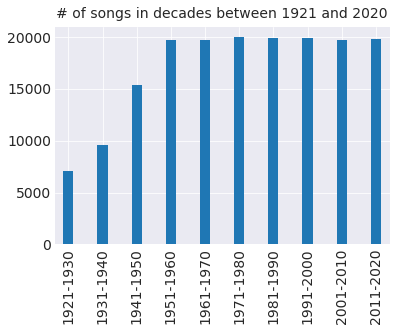

In [70]:
periods = [[1921, 1930], 
           [1931, 1940], 
           [1941, 1950], 
           [1951, 1960], 
           [1961, 1970], 
           [1971, 1980], 
           [1981, 1990],
           [1991, 2000], 
           [2001, 2010], 
           [2011, 2020]]
df_periods_list =[]

for period in periods:
    df_periods_list.append(year_range(df, period))
    
periods_list = list(period_track_count.keys())

printmd('#### # of songs in decades between 1921 and 2020')
df_track_count = pd.DataFrame.from_dict(period_track_count, orient='index')
display(df_track_count)


plot_df.plot_df_bar(df_track_count,
        title ='# of songs in decades between 1921 and 2020',
        x_label = '',
        y_label = '',
        figsize=(6,4),
        layout=(1, 1),
        width=0.3,
        align='center',
        subplots=False,
        legend_state=False,
        fontsize_title=14,
        fontsize_axes_values=14,
        fontsize_axes_label=14,
        fontsize_text=14,
        fontsize_legend=14)


<a id='vc'></a>

## Value counts

<a id='vc_h'></a>

### Histograms: 1921-2020

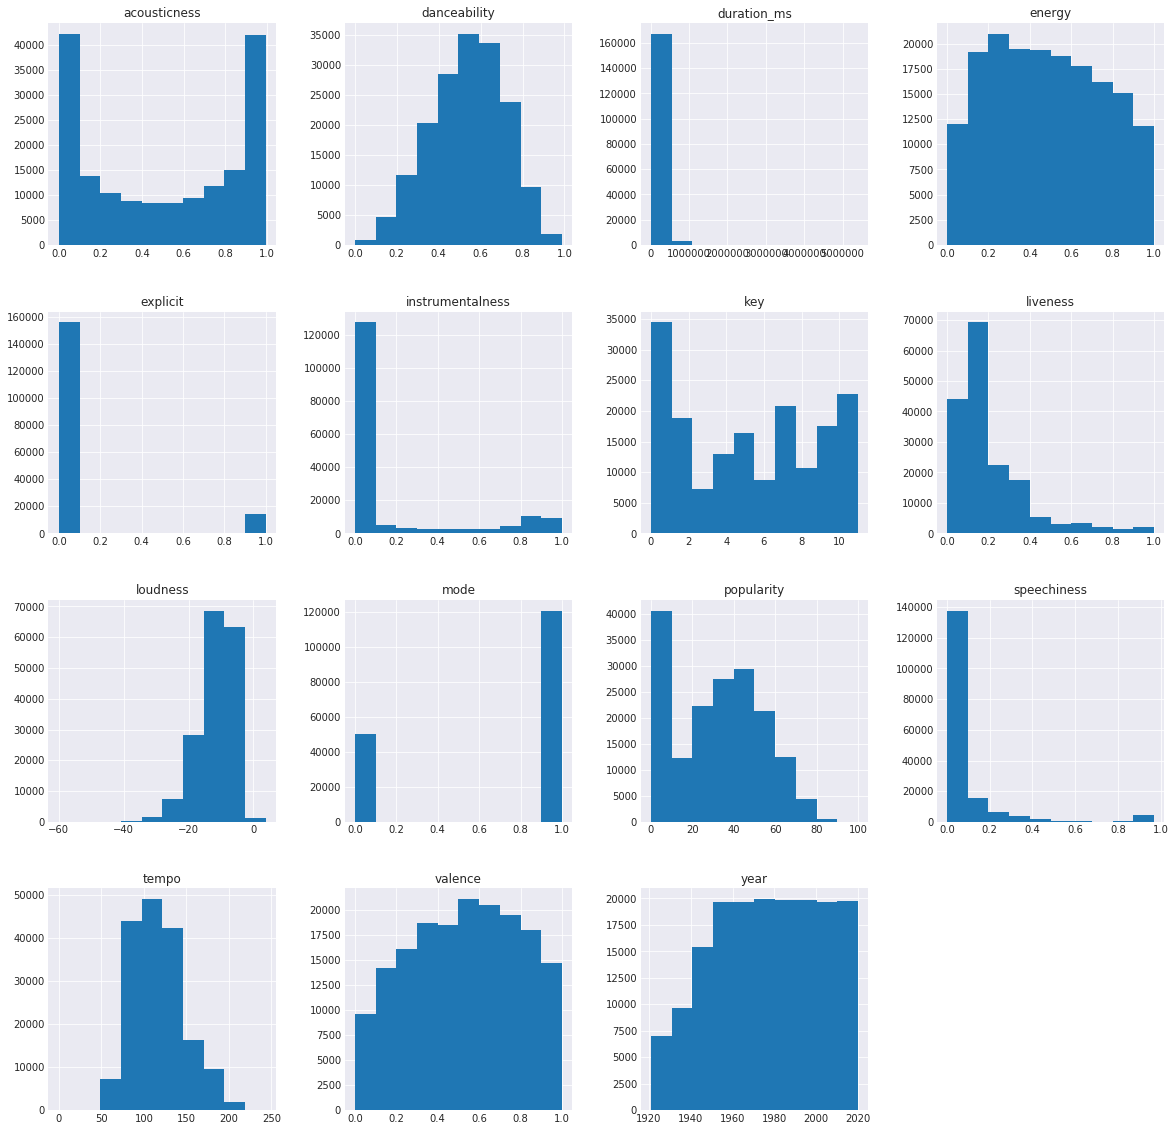

In [71]:
#Looking at the overall Data Distribution
df.hist(figsize = (20,20))
plt.show()

<a id='vc_pd'></a>

<a id='vc_p'></a>

### Bar Plots & Pie Charts - Key and Mode Distributions 1921-2020

,Major,Minor
C,17440,4160
C#,9555,3331
D,14703,4120
D#,5679,1618
E,7363,5570
F,10835,5595
F#,5098,3643
G,16652,4151
G#,8745,2006
A,11765,5806


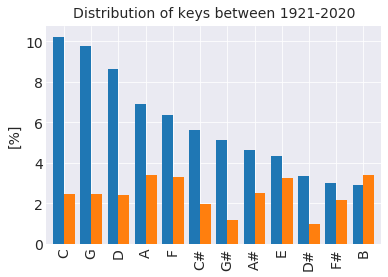

In [85]:
df_key_mode['Major'] = df[df['mode_trans']=='Major']['key_note'].value_counts() #Provide a pandas series of the counts for each key note in Major
df_key_mode['Minor'] = df[df['mode_trans']=='Minor']['key_note'].value_counts() #Provide a pandas series of the counts for each key note in Minor

display(df_key_mode)


plot_df.plot_df_bar(df_key_mode.sort_values(by='Major', ascending=False)/df.shape[0]*100,
        title ='Distribution of keys between 1921-2020',
        x_label = '',
        y_label = '[%]',
        figsize=(6,4),
        layout=(1, 1),
        width=0.8,
        align='center',
        subplots=False,
        set_yticks_range=False,
        yticks_start=0,
        yticks_end=18000,
        yticks_step=2500,
        legend_state=False,
        fontsize_title=14,
        fontsize_axes_values=14,
        fontsize_axes_label=14,
        fontsize_text=14,
        fontsize_legend=14)


In [73]:
# Proportion of Keys C Major and G Major wrt all songs
c_g_prop = df_key_mode.iloc[:2]['Major'].sum() / df.shape[0]
c_g_prop

0.15818649540295218

Major    120635
Minor     50018
Name: mode_trans, dtype: int64

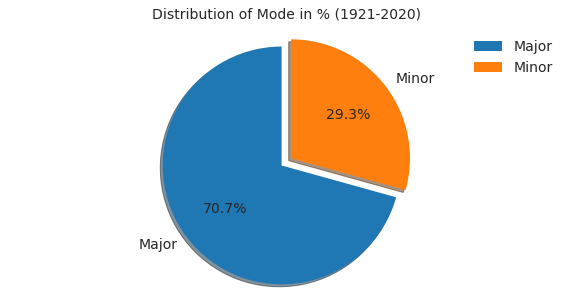

In [74]:
mode_vals = df['mode_trans'].value_counts() #Provide a pandas series of the counts for each key note
display(mode_vals)

plot_df.plot_df_pie(df['mode_trans'].value_counts(),
            title ='Distribution of Mode in % (1921-2020)',
            explode=[0.1, 0],
            figsize=(10,5),
            shadow=True,
            autopct='%1.1f%%',
            startangle=90,
            fontsize_title=14,
            fontsize_text=14,
            fontsize_legend=14,
            legend_state=True,
            legend_title='Mode',   
            legend_list_to_plot = '',
            legend_move = False,
            legend_x=None,
            legend_y=None
            )

**RESULTS - Key and Mode between 1921-2020:**
- More than 20% of all songs between 1921 and 2020 are written in the keys C Major or G Major.
- More than 70% percent of the songs are written in Major mode

<a id='vc_pp'></a>

### Bar Plots & Pie Charts - Popularity triggered by Key and Mode 1921 -2020?

,Major,Minor
key_note,,
A,33.231874,32.291939
A#,27.146645,33.293083
B,33.118365,34.891013
C,31.146846,29.168990
C#,32.976557,37.970880
D,33.034891,27.747816
D#,23.891178,28.559333
E,32.405270,33.846140
F,28.168989,30.578016


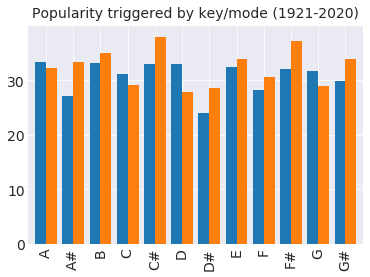

In [99]:
# Does the key note influence song popularity?
df_keyMode_popularity = pd.DataFrame()
df_keyMode_popularity['Major'] = df[df['mode_trans']=='Major'].groupby(['key_note']).mean()['popularity']
df_keyMode_popularity['Minor'] = df[df['mode_trans']=='Minor'].groupby(['key_note']).mean()['popularity']
display(df_keyMode_popularity)

plot_df.plot_df_bar(df_keyMode_popularity,
        title ='Popularity triggered by key/mode (1921-2020)',
        x_label = '',
        y_label = '',
        figsize=(6,4),
        layout=(1, 1),
        width=0.8,
        align='center',
        subplots=False,
        set_yticks_range=False,
        yticks_start=0,
        yticks_end=47,
        yticks_step=5,
        legend_state=False,
        legend_move = True,
        legend_x=0.25,
        legend_y=0.75,
        fontsize_title=14,
        fontsize_axes_values=14,
        fontsize_axes_label=14,
        fontsize_text=14,
        fontsize_legend=12)


mode_trans
Major    31.025664
Minor    32.411312
Name: popularity, dtype: float64

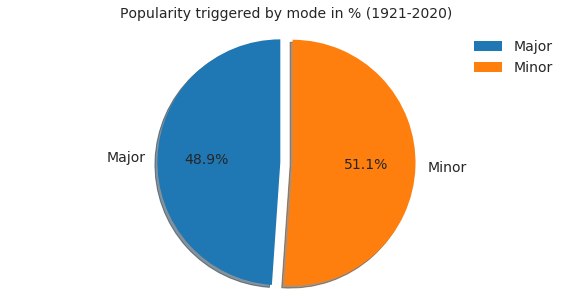

In [76]:
# Does the mode influence song popularity?
mode_popularity = df.groupby(['mode_trans']).mean()['popularity']
display(mode_popularity)

#mode_popularity.plot.pie(figsize=(10,10),autopct='%1.1f%%')
#plt.title('Song popularity triggered by mode in %')

plot_df.plot_df_pie(mode_popularity,
            title ='Popularity triggered by mode in % (1921-2020)',
            explode=[0.1, 0],
            figsize=(10,5),
            shadow=True,
            autopct='%1.1f%%',
            startangle=90,
            fontsize_title=14,
            fontsize_text=14,
            fontsize_legend=14,
            legend_state=True,
            legend_title='Mode',   
            legend_list_to_plot = '',
            legend_move = False,
            legend_x=None,
            legend_y=None
            )

**RESULTS:**
- There is no clear trend that the **key note** would trigger the popularity of a song. However, D# has the lowest mean popularity value. It is more likely to become famous producer/composer for the other keys. Possible reason: Songs written in D# is a difficult key for singers.
- There is also no significant trend that the **mode** would trigger the popularity of a song

<a id='vc_pd_2011'></a>

### Bar Plots & Pie Charts - Key and Mode Distributions 2011-2020

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,1921-1930_maj,1921-1930_min,1931-1940_maj,1931-1940_min,1941-1950_maj,1941-1950_min,1951-1960_maj,1951-1960_min,1961-1970_maj,1961-1970_min,1971-1980_maj,1971-1980_min,1981-1990_maj,1981-1990_min,1991-2000_maj,1991-2000_min,2001-2010_maj,2001-2010_min,2011-2020_maj,2011-2020_min
C,537,141,922,225,1423,495,2084,815,2357,481,2458,357,2162,386,1970,331,1855,394,1672,535
C#,477,165,466,143,1014,246,1084,178,819,171,668,326,816,360,1216,433,1290,583,1705,726
D,435,147,672,254,1038,516,1162,687,1799,542,2448,446,2094,428,1787,319,1730,422,1538,359
D#,362,128,424,177,794,200,1148,181,779,98,411,127,434,121,478,157,443,199,406,230
E,280,178,403,284,573,416,583,439,897,619,1111,741,1063,820,931,699,844,697,678,677
F,457,285,640,327,1116,477,1781,966,1618,669,1202,460,1086,488,1078,525,990,611,867,787
F#,321,161,329,217,542,230,479,171,427,212,381,362,514,491,665,526,715,551,725,722
G,560,173,929,288,1271,462,1671,691,2132,498,2256,388,2156,377,2247,363,1902,387,1528,524
G#,425,129,539,90,868,226,1537,174,1018,112,616,126,747,223,879,243,1011,298,1105,385
A,387,241,516,340,834,441,833,544,1479,681,2026,829,1752,845,1598,576,1330,646,1010,663


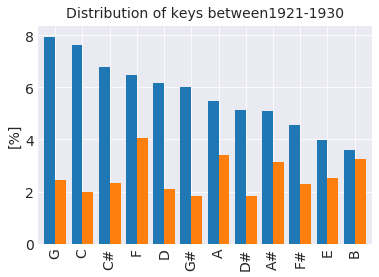

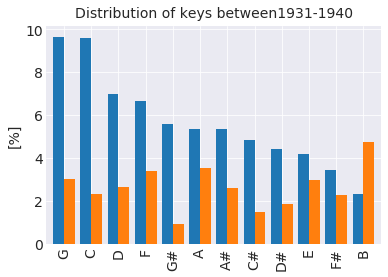

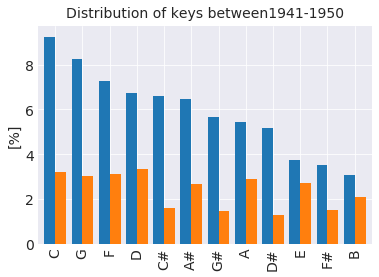

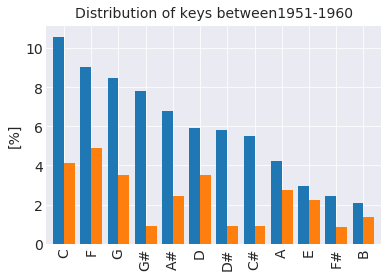

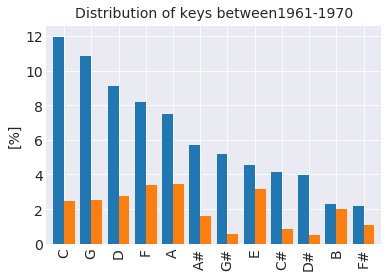

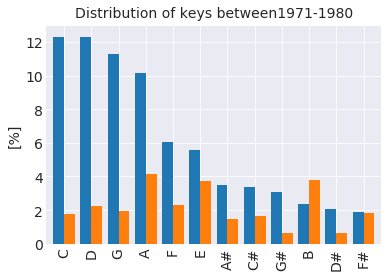

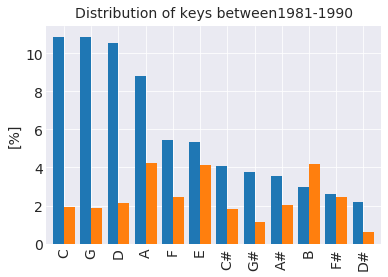

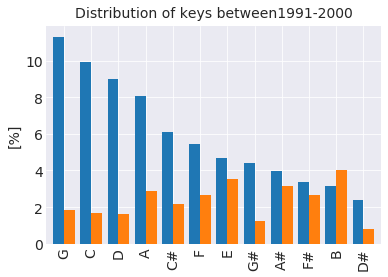

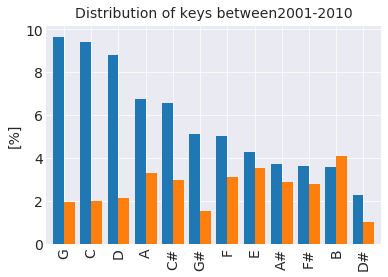

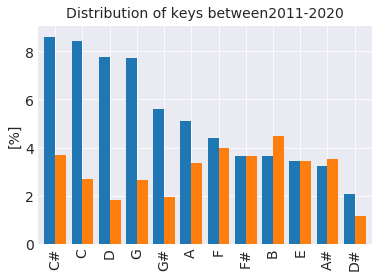

In [107]:
# Dictionary of musical notes for backward Key Note Translation
key_dictionary = {0: 'C', 1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'}
columns = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'] 
df_keyMajMin_vals = pd.DataFrame(index=index_values)
for period, df_period in zip(periods_list, df_periods_list):
    df_period['key_note'] = df_period['key'].map(key_dictionary) # Create a 'key_note' column
    
    df_keyMajMin_vals[period + '_maj'] = df_period[df_period['mode_trans']=='Major']['key_note'].value_counts() #Provide a pandas series of the counts for each key note
    df_keyMajMin_vals[period + '_min'] = df_period[df_period['mode_trans']=='Minor']['key_note'].value_counts() #Provide a pandas series of the counts for each key note
    
    df_to_plot = df_keyMajMin_vals.loc[:,[period + '_maj', period + '_min']].sort_values(by=period + '_maj', ascending=False)/df_period.shape[0]*100
   
    plot_df.plot_df_bar(df_to_plot,
            title ='Distribution of keys between' + period,
            x_label = '',
            y_label = '[%]',
            figsize=(6,4),
            layout=(1, 1),
            width=0.8,
            align='center',
            subplots=False,
            set_yticks_range=False,
            yticks_start=0,
            yticks_end=18000,
            yticks_step=2500,
            legend_state=False,
            fontsize_title=14,
            fontsize_axes_values=14,
            fontsize_axes_label=14,
            fontsize_text=14,
            fontsize_legend=14)
    
    
display(df_keyMajMin_vals)

## The HipHop phenomenon in the decade 2011-2020
Why are there so many songs in C# Major in the period 2011-2020?
- There is a significant shift from C to C# in the frequency distribution. This fact could be related to several circumstances:
    - Wrong classification. Via own sample investigation there are a lot of C# Major songs in the database which are misclassified. The database label for C# is 1. It seems that in a lot of cases, which were difficult to analyze, the label 1 was used.  
    - Accordingly to a post (https://vi-control.net/community/threads/why-flat-sharp-keys-are-so-usual-into-hip-hop.29561/) there seems to be an actual trend in HipHop to use flat keys: C# Major seems to be a favorite key. By an analysis over 500,000 Echo Nest tracks the following relations were reported. If flat keys are used than 20.0% are written in Db (C#).
    - However: For HipHop based tracks the mode of the song is in some cases not clear. So some kind of misclassification is going on. Some proportion of C#  Minor songs are also misinterpreted as C# Major songs.
    - Guitarists like to use a capodaster in the first fret. C Major Songs are transposed to C# Major songs in that way. A famous example is the song Lemon Tree from to shift the 

- In this period (like for the whole 1921-2020 period) there is no clear trend that the key note would trigger the popularity of a song. It seems that all keys are similarily succesfull in terms of popularity.
- There is also no significant trend that the mode would trigger the popularity of a song

Most used flat keys into Hip Hop style:
12,000 minor mode tracks : 17.0% for Bb
18,000 Major mode tracks : 20.0% for Db

https://vi-control.net/community/threads/why-flat-sharp-keys-are-so-usual-into-hip-hop.29561/

In [78]:
name_list = ['Lemon Tree', 'WAP (feat. Megan Thee Stallion)', 'If the World Was Ending - feat. Julia Michaels', 'We Paid (feat. 42 Dugg)']
df[(df['key_note'] == 'C#') & (df['mode_trans'] == 'Major') & (df['name'].isin(name_list))][['name', 'artists', 'popularity', 'year','key_note', 'mode_trans']].sort_values(by='popularity',ascending=False)

,name,artists,popularity,year,key_note,mode_trans
19608,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']",96,2020,C#,Major
19414,If the World Was Ending - feat. Julia Michaels,"['JP Saxe', 'Julia Michaels']",87,2019,C#,Major
19664,We Paid (feat. 42 Dugg),"['Lil Baby', '42 Dugg']",82,2020,C#,Major
14702,Lemon Tree,['Fools Garden'],78,1995,C#,Major


Major    12594
Minor     7194
Name: mode_trans, dtype: int64

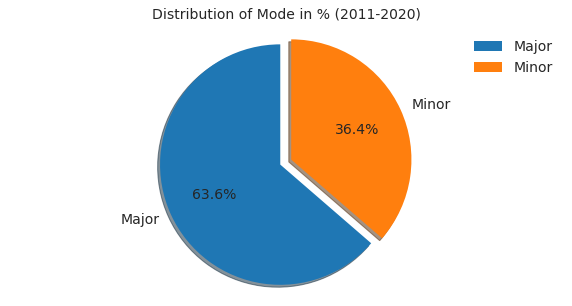

In [90]:
mode_vals_2011_2020 = df_periods_list[-1]['mode_trans'].value_counts() #Provide a pandas series of the counts for each key note
display(mode_vals_2011_2020)

#mode_vals_2011_2020.plot.pie(figsize=(10,10),autopct='%1.1f%%')
#plt.title('Distribution of Mode in %')


plot_df.plot_df_pie(mode_vals_2011_2020,
            title ='Distribution of Mode in % (2011-2020)',
            explode=[0.1, 0],
            figsize=(10,5),
            shadow=True,
            autopct='%1.1f%%',
            startangle=90,
            fontsize_title=14,
            fontsize_text=14,
            fontsize_legend=14,
            legend_state=True,
            legend_title='Mode',   
            legend_list_to_plot = '',
            legend_move = False,
            legend_x=None,
            legend_y=None
            )

<a id='vc_pp_2011'></a>

### Bar Plots & Pie Charts - Popularity triggered by Key and Mode 2011 - 2020?

,Major,Minor
key_note,,
A,59.068317,57.601810
A#,60.179245,59.487805
B,58.075967,56.952756
C,57.219498,60.583178
C#,59.593548,59.659780
D,57.721066,58.827298
D#,57.248768,60.739130
E,58.893805,58.369276
F,60.325260,60.224905


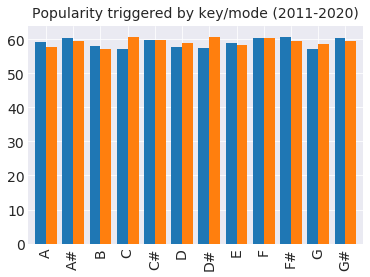

In [103]:
# Does the key note influence song popularity?
df_keyMode_popularity = pd.DataFrame()
df_2011_2020 = df_periods_list[-1]

df_keyMode_popularity['Major'] = df_2011_2020[df_2011_2020['mode_trans']=='Major'].groupby(['key_note']).mean()['popularity']
df_keyMode_popularity['Minor'] = df_2011_2020[df_2011_2020['mode_trans']=='Minor'].groupby(['key_note']).mean()['popularity']
display(df_keyMode_popularity)


plot_df.plot_df_bar(df_keyMode_popularity,
        title ='Popularity triggered by key/mode (2011-2020)',
        x_label = '',
        y_label = '',
        figsize=(6,4),
        layout=(1, 1),
        width=0.8,
        align='center',
        subplots=False,
        set_yticks_range=False,
        yticks_start=0,
        yticks_end=78,
        yticks_step=10,
        legend_state=False,
        legend_move = True,
        legend_x=0.25,
        legend_y=0.75,
        fontsize_title=14,
        fontsize_axes_values=14,
        fontsize_axes_label=14,
        fontsize_text=14,
        fontsize_legend=12)

mode_trans
Major    58.714308
Minor    59.023075
Name: popularity, dtype: float64

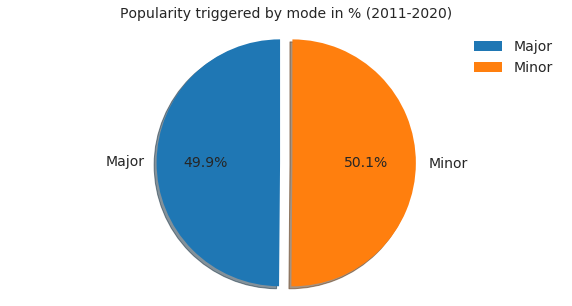

In [102]:
# Does the mode influence song popularity?
mode_popularity_2011_2020 = df_2011_2020.groupby(['mode_trans']).mean()['popularity']
display(mode_popularity_2011_2020)

#mode_popularity_2011_2020.plot.pie(figsize=(10,10),autopct='%1.1f%%')
#plt.title('Song popularity triggered by mode in %')


plot_df.plot_df_pie(mode_popularity_2011_2020,
            title ='Popularity triggered by mode in % (2011-2020)',
            explode=[0.1, 0],
            figsize=(10,5),
            shadow=True,
            autopct='%1.1f%%',
            startangle=90,
            fontsize_title=14,
            fontsize_text=14,
            fontsize_legend=14,
            legend_state=True,
            legend_title='Mode',   
            legend_list_to_plot = '',
            legend_move = False,
            legend_x=None,
            legend_y=None
            )

**RESULTS 2011-2020:**
- For this period (like for the whole 1921-2020 period) there is no clear trend that the **key note** would trigger the popularity of a song. It seems that all keys are similarily succesfull in terms of popularity.
- There is also no significant trend that the **mode** would trigger the popularity of a song

<a id='cor'></a>

## Correlation

<a id='cor_p'></a>

### Correlation Plot

<a id='corr'></a>

In [ ]:
# Looking at correlations
plt.figure(figsize = (15,15)) #creating the 'canvas'
sns.heatmap(df.corr(), annot=True)

<a id='cor_s'></a>

### Correlation sorted

In [ ]:
# Sort correaltion matrix
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack().sort_values()
corr_pop = corr_pairs['popularity'].drop('popularity', axis=0)
display(corr_pop)

corr_pop.plot.bar(figsize=(10,10))
plt.title('What does influence song popularity? ')

In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

**RESULTS:**
- The Year of publishing is the most important parameter for popularity
- The louder more energetic, the higher the danceability, the higher the popularity
- However: acoustic or instrumental songs are counterproductive with regard to popularity

### Subsets 

### Answering Questions

In [ ]:
sol = {'Everyone should get a higher level of formal education': False, 
       'Regardless of formal education, online courses are the top suggested form of education': True,
       'There is less than a 1% difference between suggestions of the two groups for all forms of education': False,
       'Those with higher formal education suggest it more than those who do not have it': True}

### Value Count --- Subtract null values

In [ ]:
#Narrow down dataset to TimeAfterBoootcamp related questions
bootcamp_df = df[df['TimeAfterBootcamp'].isnull() == False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull() == True]
bootcamp_df.shape

In [ ]:
# part of dataset with non null data for TimeAfterBootcamp
gender_distr = bootcamp_df['Gender'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['Gender'].isnull()))
display(gender_distr)
gender_distr.plot(kind="bar");
plt.title("Distribution of degrees");

In [ ]:
# part of dataset with null data for TimeAfterBootcamp - Gender
gender_not_distr = not_bootcamp_df['Gender'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['Gender'].isnull()))
display(gender_not_distr)
gender_not_distr.plot(kind="bar");
plt.title("Distribution of degrees");

### Groupby + mean aggregate

In [ ]:
df.groupby(['EmploymentStatus']).mean()

In [ ]:
# Does Employment Status influence Job Satisfaction
df.groupby(['HomeRemote']).mean()['JobSatisfaction'].sort_values().dropna()

In [ ]:
df.groupby(['CompanySize']).mean()['JobSatisfaction'].sort_values()

### groupby - query

In [ ]:
pd.DataFrame(df.query("Professional == 'Professional developer' and (Gender == 'Male' or Gender == 'Female')").groupby(['Gender', 'FormalEducation']).mean()['Salary'])

### Descriptive statistics

In [ ]:
df.describe(include='all')

In [ ]:
df.describe(include='all').loc['std', :].sort_values()

### Histogtram

In [ ]:
df.hist();

### Corelation Plot

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

### Sort Correlation Matrix

In [ ]:
correlation_mat = df.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

### SKLEARN - ML
Remove all nan values for SKLEARN

In [ ]:
num_vars = df[['Salary', 'CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
all_rm = num_vars.dropna()# dataframe with rows for nan Salaries removed

all_rm.head()

In [ ]:
X_2 = all_rm[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]#Create X using explanatory variables from all_rm
y_2 = all_rm['Salary'] #Create y using Salary from sal_rm

# Split data into training and test data, and fit a linear model
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2 , test_size=.30, random_state=42)
lm_2_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_2_model.fit(X_2_train, y_2_train)
except:
    print("Oh no! It doesn't work!!!")

In [ ]:
y_test_preds = lm_2_model.predict(X_2_test)# Predictions here using X_2 and lm_2_model
rsquared_score =  r2_score(y_2_test, y_test_preds) # Rsquared here for comparing test and preds from lm_2_model

length_y_test = len(y_2_test)#num in y_test

print("The r-squared score for your model was {} on {} values. \nThe r-squared score is a measure for the portion of variability explained by the model".format(rsquared_score, length_y_test))

### Working with categorical data

In [ ]:
# Check dtypes
df.dtypes

In [ ]:
# Check number of different categories
df.dtypes.value_counts()

In [ ]:
# Subset to a dataframe only holding the categorical columns
cat_df = df.select_dtypes(include=['object']).copy() 

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]

In [ ]:
# Create DUMMY VARIABLES
dummy_cols_df = pd.get_dummies(df['Gender'], dummy_na=True)
dummy_cols_df

In [ ]:
# Create DUMMY VARIABLES IN A FUNCTION
#Create a copy of the dataframe
cat_df_copy = cat_df.copy()
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show shape to assure it has a shape of (5009, 11938)
print(df_new.shape)

### Clean Data and Fit --- All in one

In [ ]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test
    



#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'Salary', cat_cols_lst, dummy_na=False)

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

In [ ]:
# Notice in the model above there some portion of overfitting. For example: Remove columns which do not help the fitting process.

### Putting it all together

In [ ]:
def clean_data(df, response_col, drop_cols, dummy_na):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    # Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)
    
    # Split into response variables
    y = df[response_col]
    
    # Drop response_col and not useful columns from X
    df = df.drop(['Respondent','ExpectedSalary', response_col], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
            
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df, 'Salary', ['Respondent','ExpectedSalary'], dummy_na=False)    

#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = alltogether.find_optimal_lm_mod(X, y, cutoffs)

In [ ]:
print(r2_scores_train)
print(r2_scores_test)

a = 'we would likely have a better rsquared for the test data.'
b = 1000
c = 872
d = 0.69
e = 0.82
f = 0.88
g = 0.72
h = 'we would likely have a better rsquared for the training data.'

q4_piat = {'The optimal number of features based on the results is': c, 
               'The model we should implement in practice has a train rsquared of': e, 
               'The model we should implement in practice has a test rsquared of': d,
               'If we were to allow the number of features to continue to increase': h
}

### Evaluate coefficients (weights)
The larger the coefficient, the larger the expected impact on salary. 

In [ ]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

In [ ]:
a = True
b = False

#According to the data...
q5_piat = {'Country appears to be one of the top indicators for salary': a,
               'Gender appears to be one of the indicators for salary': b, 
               'How long an individual has been programming appears to be one of the top indicators for salary': a,
               'The longer an individual has been programming the more they are likely to earn': b}